# Append hand edit topography modifications to the interpolated topography

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from datetime import datetime
import os
import sys
sys.path.insert(0,os.path.abspath('src/'))
from datetime import date
from topo_edit_util import inspect_topo, create_soc_topo_table

## Get input topography data set

In [2]:
grid = 'tx2_3v2'
topo = 'SRTM15_V2.4'
nsub = 'sub150'
topo_src = 'srtm'
edit = 'edit4'
case = 'SmL1.0_C1.0'
depth_var_in = 'D_interp'
path_root = './'

In [3]:
path_in = path_root 

file_in = 'topo.' + nsub + '.' + grid + '.' + topo_src + '.' + edit + '.' + case + '.nc'
print(path_in+file_in)
dss = xr.open_dataset(path_in+file_in)

depth_var_new = 'depth'
dss[depth_var_new] = dss[depth_var_in].copy(deep=True)

./topo.sub150.tx2_3v2.srtm.edit4.SmL1.0_C1.0.nc


In [4]:
dss

<xarray.Dataset>
Dimensions:     (lonh: 540, lath: 480, lonq: 541, latq: 481)
Coordinates:
  * lonh        (lonh) float64 -286.7 -286.0 -285.3 -284.7 ... 71.33 72.0 72.67
  * lath        (lath) float64 -81.56 -81.46 -81.36 -81.26 ... 89.33 89.6 89.86
  * lonq        (lonq) float64 -287.0 -286.3 -285.7 -285.0 ... 71.67 72.33 73.0
  * latq        (latq) float64 -81.61 -81.51 -81.41 -81.31 ... 89.46 89.72 89.91
Data variables: (12/16)
    geolon      (lath, lonh) float64 ...
    geolat      (lath, lonh) float64 ...
    geolonb     (latq, lonq) float64 ...
    geolatb     (latq, lonq) float64 ...
    z           (lath, lonh) float32 ...
    ocn_frac    (lath, lonh) float32 ...
    ...          ...
    D_min       (lath, lonh) float32 ...
    D_max       (lath, lonh) float32 ...
    hand_edits  (lath, lonh) int32 ...
    orig_mask   (lath, lonh) int32 ...
    D_interp    (lath, lonh) float32 ...
    depth       (lath, lonh) float32 ...
Attributes:
    Description:             Ocean Topography Statistics on MOM6 Grid
    Creator:                 Frank Bryan (bryan@ucar.edu)
    Created:                 20240216
    Generating Code:         create_model_topo.f90
    Model Grid Version:      tx2_3v2
    Source Topography Data:  /glade/campaign/cgd/oce/datasets/obs/SRTM/SRTM15...
    Edit History:            Hand Edit + Lake Fill 02/16/2024

## Hand edit topography changes

In [5]:
iEdit=[]
jEdit=[]
zEdit = []

### Sanhihe Islands (between Philippines and Indonesia)

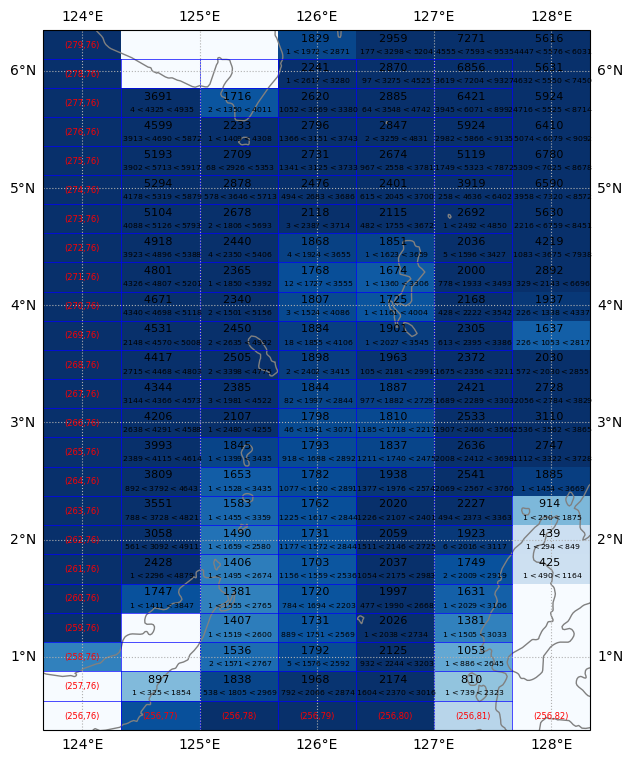

In [6]:
place = ' '
#print(soc_table[place])
lon_beg = -236.
lon_end = -231.5
lat_beg = 0.5
lat_end = 6.5
zmax = 2000.

ax=inspect_topo(dss,depth_var_in,lon_beg,lon_end,lat_beg,lat_end,zmax)

18


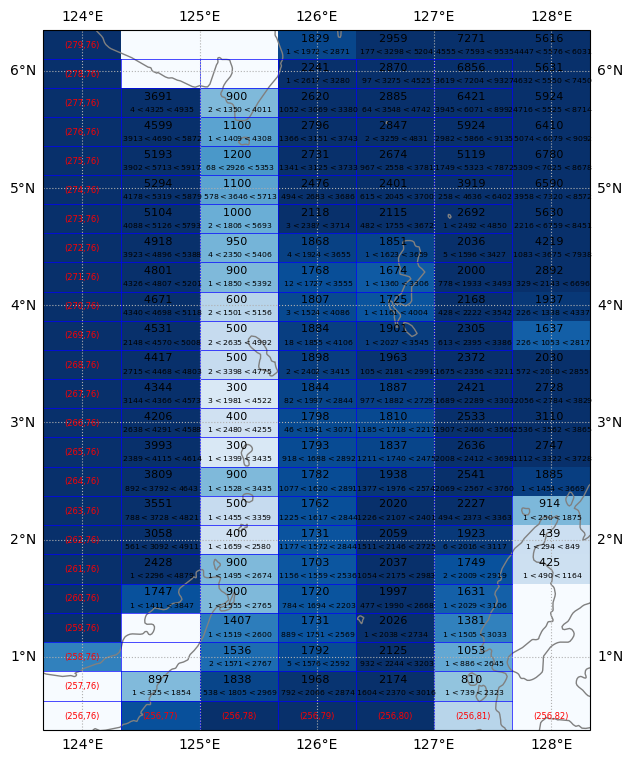

In [7]:
i = np.ones(18, dtype=np.int32) * 78
j = np.arange(260,278,1, dtype=np.int32) 
z = np.array([900,900,400, 500, 900,300,400,300,500,500,600,900,
              950,1000,1100,1200,1100,900],float)
n = np.shape(z)[0]
print(n)
for n in range(n) :
    dss[depth_var_new][j[n],i[n]] = z[n]

ax=inspect_topo(dss,depth_var_new,lon_beg,lon_end,lat_beg,lat_end,zmax)

iEdit = np.concatenate((iEdit,i))
jEdit = np.concatenate((jEdit,j))
zEdit = np.concatenate((zEdit,z))

### Sulu Sea

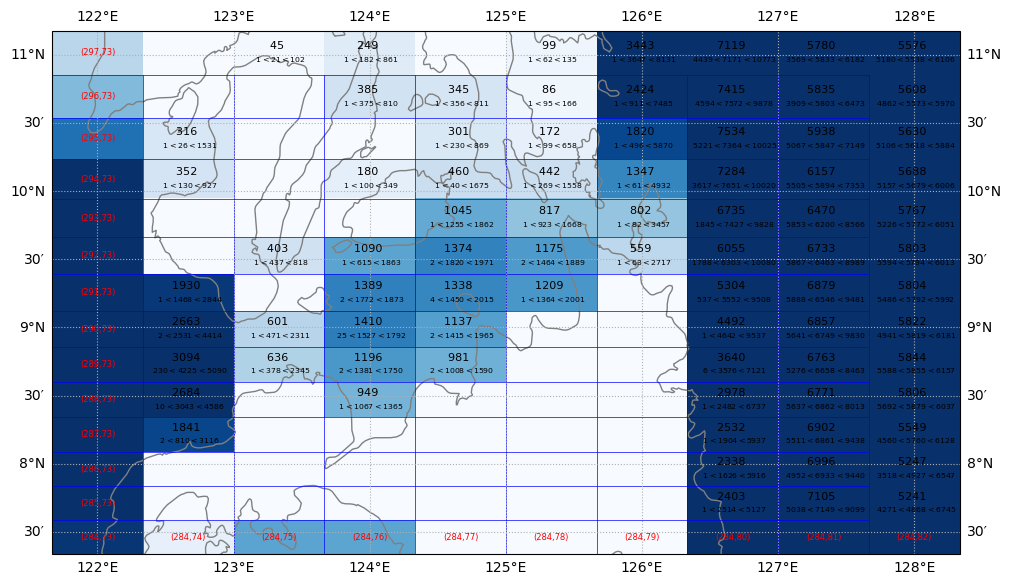

In [8]:
place = ' '
#print(soc_table[place])
lon_beg = -238
lon_end = -231.5
lat_beg = 7.5
lat_end = 11.5
zmax = 2000.

ax=inspect_topo(dss,depth_var_in,lon_beg,lon_end,lat_beg,lat_end,zmax)

4


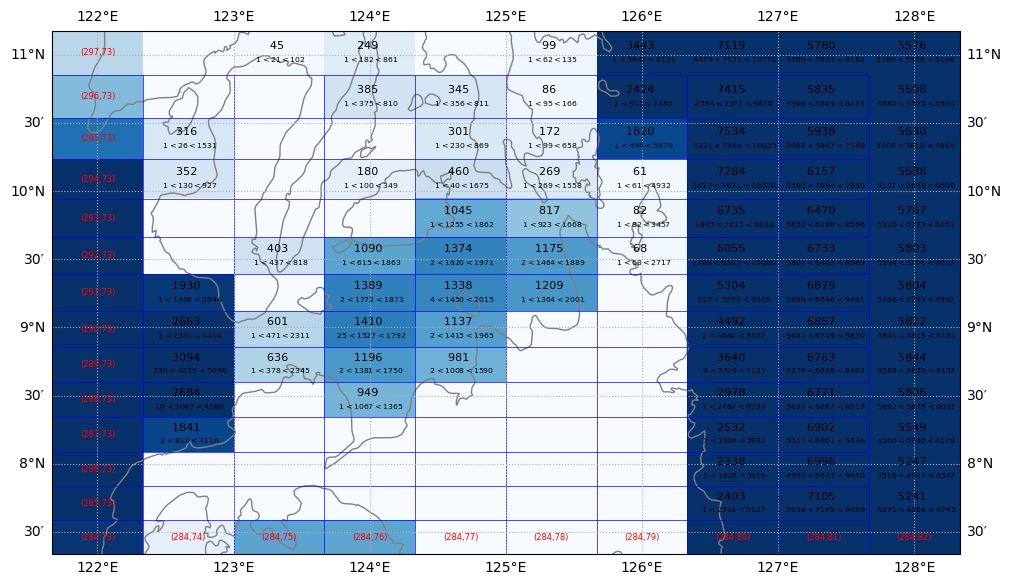

In [9]:
i = np.array([78,79,79, 79],np.int32)
j = np.array([294,292,293, 294],np.int32)
z = np.array([269,68,82, 61],float)
n = np.shape(z)[0]
print(n)
for n in range(n) :
    dss[depth_var_new][j[n],i[n]] = z[n]

ax=inspect_topo(dss,depth_var_new,lon_beg,lon_end,lat_beg,lat_end,zmax)

iEdit = np.concatenate((iEdit,i))
jEdit = np.concatenate((jEdit,j))
zEdit = np.concatenate((zEdit,z))

### Bosphorus

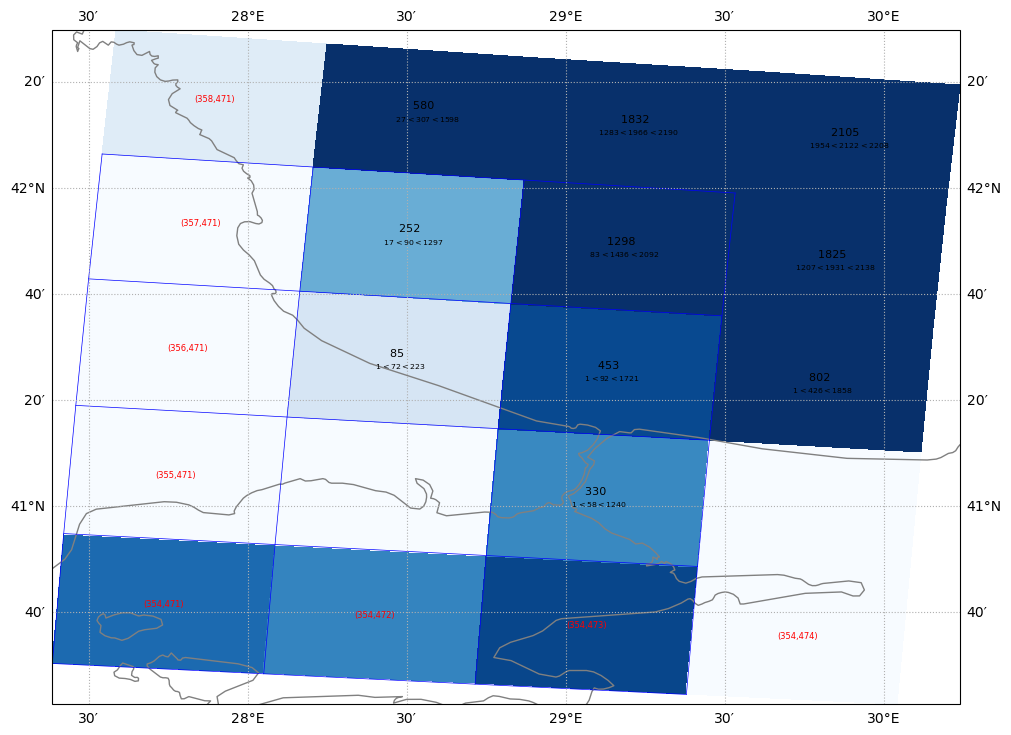

In [10]:
## Black Sea / Bosphorus
lon_beg = 28
lon_end = 30.5
lat_beg = 40.5
lat_end = 42.5
zmax = 500.

ax=inspect_topo(dss,depth_var_in,lon_beg,lon_end,lat_beg,lat_end,zmax)

1


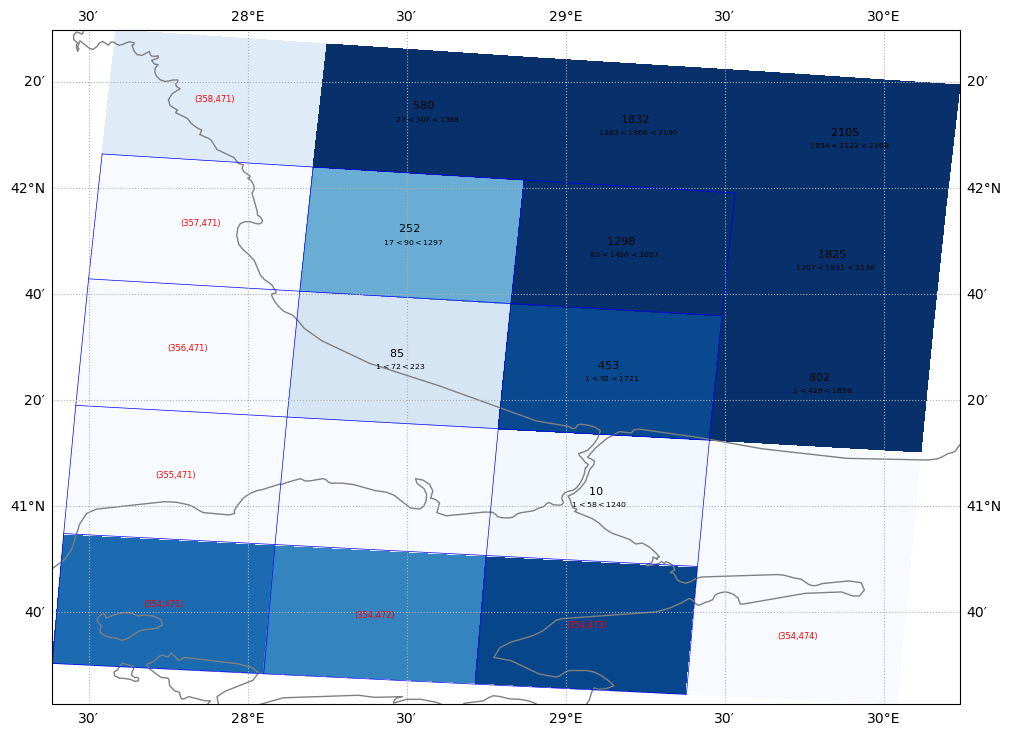

In [11]:
i = np.array([473,],np.int32)
j = np.array([355,],np.int32)
z = np.array([10.],np.int32)
n = np.shape(j)[0]
print(n)

for n in range(n) :
    #z = dss['D_median'][j[n],i[n]]
    dss[depth_var_new][j[n],i[n]] = z[n]
    iEdit = np.concatenate((iEdit,(i[n],)))
    jEdit = np.concatenate((jEdit,(j[n],)))
    zEdit = np.concatenate((zEdit,(z[n],)))
    
ax=inspect_topo(dss,depth_var_new,lon_beg,lon_end,lat_beg,lat_end,zmax)


### Dardanelles

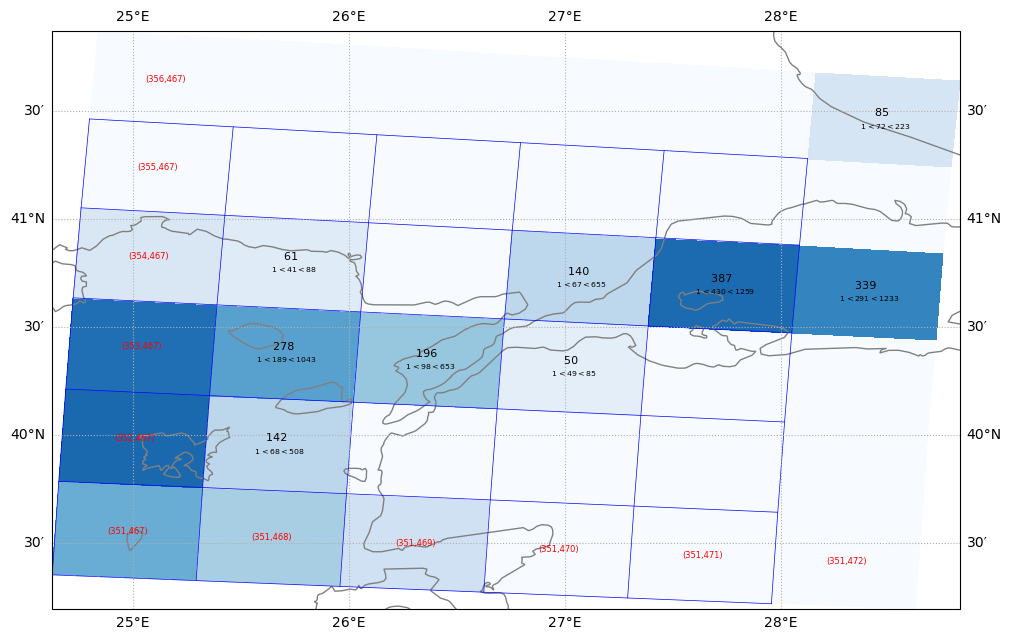

In [12]:
## Black Sea / Dardannelles
lon_beg = 25
lon_end = 29
lat_beg = 39.5
lat_end = 42
zmax = 500.

ax=inspect_topo(dss,depth_var_in,lon_beg,lon_end,lat_beg,lat_end,zmax)


2


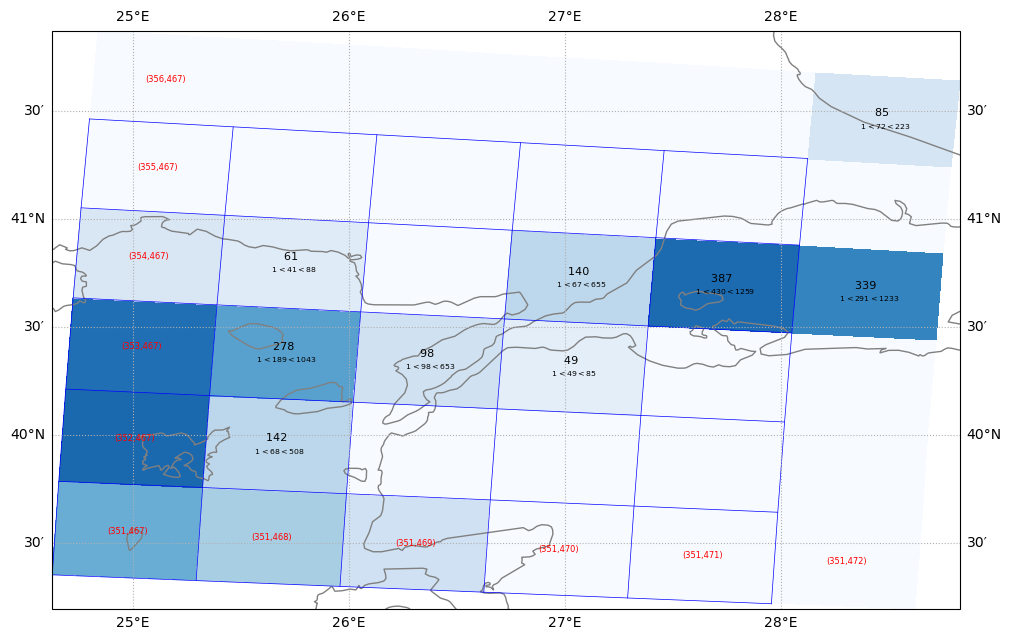

In [13]:
i = np.array([469,470,],np.int32)
j = np.array([353,353,],np.int32)
n = np.shape(j)[0]
print(n)
for n in range(n) :
    z = dss['D_median'][j[n],i[n]]
    dss[depth_var_new][j[n],i[n]] = z
    iEdit = np.concatenate((iEdit,(i[n],)))
    jEdit = np.concatenate((jEdit,(j[n],)))
    zEdit = np.concatenate((zEdit,(z,)))
    
ax=inspect_topo(dss,depth_var_new,lon_beg,lon_end,lat_beg,lat_end,zmax)


## Set up output file

In [14]:
path_out = path_in
file_out_topo = 'ocean_topo_{}_{}{}{}.nc'.format(grid,datetime.now().isoformat()[2:4],datetime.now().isoformat()[5:7],
       datetime.now().isoformat()[8:10])

print('topo edit file : ',file_out_topo)

topo edit file :  ocean_topo_tx2_3v2_240501.nc


## Create output dataset

In [15]:
nlong = np.int32(np.shape(dss[depth_var_new])[0])
nlatg = np.int32(np.shape(dss[depth_var_new])[1])
print(nlong,nlatg)

nEdits = np.shape(zEdit)
ds_edits = xr.Dataset(
 {'iEdit': (['nEdits'], iEdit.astype('int32'), {'long_name' : "i-index of edited depth"}),
  'jEdit': (['nEdits'], jEdit.astype('int32'), {'long_name' : "j-index of edited depth"}),
  'zEdit': (['nEdits'], zEdit, {'long_name' : "New value of depth", 'units' : 'meters'}),
 }
  )
ds_edits.attrs['title'] = 'Topography Edits'
ds_edits.attrs['original grid'] = file_in

ds_edits

480 540


<xarray.Dataset>
Dimensions:  (nEdits: 25)
Dimensions without coordinates: nEdits
Data variables:
    iEdit    (nEdits) int32 78 78 78 78 78 78 78 78 ... 78 79 79 79 473 469 470
    jEdit    (nEdits) int32 260 261 262 263 264 265 ... 292 293 294 355 353 353
    zEdit    (nEdits) float64 900.0 900.0 400.0 500.0 ... 61.0 10.0 97.67 49.45
Attributes:
    title:          Topography Edits
    original grid:  topo.sub150.tx2_3v2.srtm.edit4.SmL1.0_C1.0.nc

In [16]:
ds_out = xr.merge([dss, ds_edits])
ds_out

<xarray.Dataset>
Dimensions:     (lonh: 540, lath: 480, lonq: 541, latq: 481, nEdits: 25)
Coordinates:
  * lonh        (lonh) float64 -286.7 -286.0 -285.3 -284.7 ... 71.33 72.0 72.67
  * lath        (lath) float64 -81.56 -81.46 -81.36 -81.26 ... 89.33 89.6 89.86
  * lonq        (lonq) float64 -287.0 -286.3 -285.7 -285.0 ... 71.67 72.33 73.0
  * latq        (latq) float64 -81.61 -81.51 -81.41 -81.31 ... 89.46 89.72 89.91
Dimensions without coordinates: nEdits
Data variables: (12/19)
    geolon      (lath, lonh) float64 ...
    geolat      (lath, lonh) float64 ...
    geolonb     (latq, lonq) float64 ...
    geolatb     (latq, lonq) float64 ...
    z           (lath, lonh) float32 ...
    ocn_frac    (lath, lonh) float32 ...
    ...          ...
    orig_mask   (lath, lonh) int32 ...
    D_interp    (lath, lonh) float32 ...
    depth       (lath, lonh) float32 ...
    iEdit       (nEdits) int32 78 78 78 78 78 78 78 ... 78 79 79 79 473 469 470
    jEdit       (nEdits) int32 260 261 262 263 264 265 ... 293 294 355 353 353
    zEdit       (nEdits) float64 900.0 900.0 400.0 500.0 ... 10.0 97.67 49.45
Attributes:
    Description:             Ocean Topography Statistics on MOM6 Grid
    Creator:                 Frank Bryan (bryan@ucar.edu)
    Created:                 20240216
    Generating Code:         create_model_topo.f90
    Model Grid Version:      tx2_3v2
    Source Topography Data:  /glade/campaign/cgd/oce/datasets/obs/SRTM/SRTM15...
    Edit History:            Hand Edit + Lake Fill 02/16/2024

In [17]:
ds_out.attrs['Manual edits updated on:'] =  datetime.now().isoformat()
ds_out.attrs['By:'] =  'Gustavo Marques (gmarques@ucar.edu)'
ds_out.attrs['url'] = 'https://github.com/NCAR/tx2_3/topography/Append_topo_edits.ipynb'

In [18]:
ds_out.to_netcdf(path_out+file_out_topo)

/glade/u/apps/opt/conda/envs/npl-2024a/lib/python3.11/site-packages/dask/config.py:742: FutureWarning: Dask configuration key 'allowed-failures' has been deprecated; please use 'distributed.scheduler.allowed-failures' instead
  warnings.warn(


In [19]:
file_out_topo

'ocean_topo_tx2_3v2_240501.nc'